### **Applying Decision tree Algorithm for heart attack data**

In [1]:
## import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\Users\Karth\Downloads\Machine learning\Datasets\Heartattack_prediction_data.xlsx")

In [4]:
df.shape

(4312, 14)

In [5]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [7]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [8]:
df['RiskOfCHD'].value_counts()

RiskOfCHD
0    3654
1     658
Name: count, dtype: int64

In [9]:
df1= df.dropna()

In [10]:
df1.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [11]:
df1.duplicated().sum()

np.int64(68)

In [12]:
df1.drop_duplicates(inplace=True)

In [13]:
df1.duplicated().sum()

np.int64(0)

In [14]:
df1.describe()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
count,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000
mean,0.436313,49.549253,75.794125,82.040010,25.797371,0.489997,9.031907,0.309952,132.273614,82.869840,0.030134,0.005571,0.026589,0.151684
std,0.495990,8.561709,12.017503,23.496781,4.067156,0.499963,11.962920,0.462532,21.939643,11.881098,0.170978,0.074441,0.160899,0.358760
min,0.000000,32.000000,44.000000,40.000000,15.540000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,68.000000,72.000000,23.080000,0.000000,0.000000,0.000000,117.000000,75.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,75.000000,78.000000,25.380000,0.000000,0.000000,0.000000,128.000000,82.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,83.000000,87.000000,28.040000,1.000000,20.000000,1.000000,143.500000,89.500000,0.000000,0.000000,0.000000,0.000000
max,1.000000,70.000000,143.000000,394.000000,56.800000,1.000000,70.000000,1.000000,295.000000,142.500000,1.000000,1.000000,1.000000,1.000000


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,3949.0,0.436313,0.495990,0.00,0.00,0.00,1.00,1.0
Age,3949.0,49.549253,8.561709,32.00,42.00,49.00,56.00,70.0
Heart Rate,3949.0,75.794125,12.017503,44.00,68.00,75.00,83.00,143.0
Glucose,3949.0,82.040010,23.496781,40.00,72.00,78.00,87.00,394.0
BMI,3949.0,25.797371,4.067156,15.54,23.08,25.38,28.04,56.8
Smoker,3949.0,0.489997,0.499963,0.00,0.00,0.00,1.00,1.0
Ciggarates(Per Day),3949.0,9.031907,11.962920,0.00,0.00,0.00,20.00,70.0
Hypertension,3949.0,0.309952,0.462532,0.00,0.00,0.00,1.00,1.0
Systolic BP,3949.0,132.273614,21.939643,83.50,117.00,128.00,143.50,295.0
Diastolic BP,3949.0,82.869840,11.881098,48.00,75.00,82.00,89.50,142.5


**Univariate Analysis**

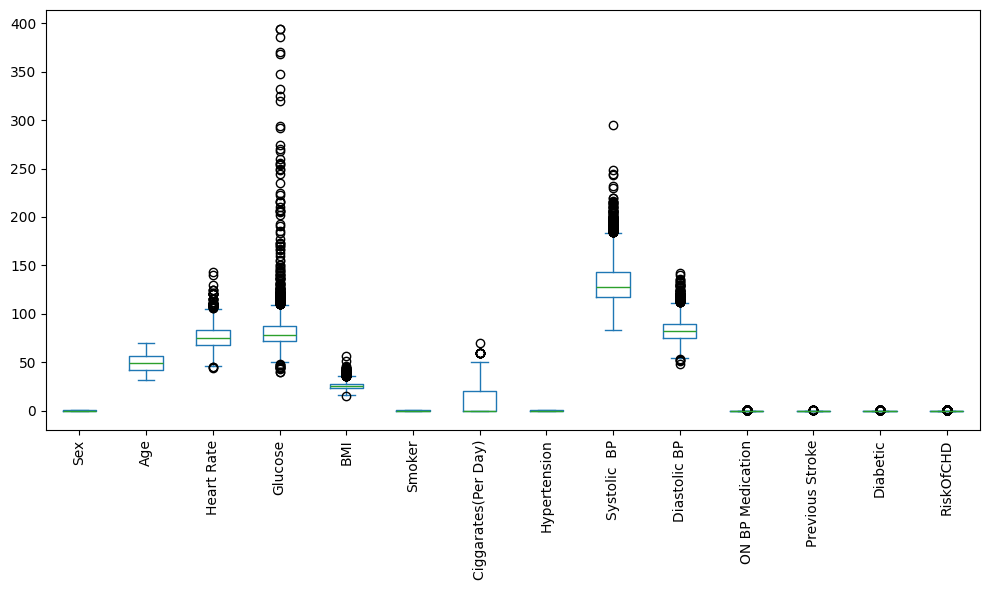

In [16]:
df1.plot(kind='box', figsize=(10,6))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
corr= df1.corr()
corr

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
Sex,1.000000,-0.020003,-0.115768,0.002544,0.077089,0.196866,0.317562,0.004364,-0.037928,0.056641,-0.053528,-0.004109,0.013290,0.096295
Age,-0.020003,1.000000,-0.010988,0.112436,0.136000,-0.215497,-0.190585,0.305719,0.391322,0.207865,0.125211,0.044478,0.102843,0.224629
Heart Rate,-0.115768,-0.010988,1.000000,0.097977,0.066829,0.060342,0.075057,0.144635,0.181418,0.175727,0.011279,-0.011742,0.055099,0.022637
Glucose,0.002544,0.112436,0.097977,1.000000,0.083040,-0.050312,-0.052097,0.080803,0.126001,0.058180,0.049382,0.014643,0.603435,0.124489
BMI,0.077089,0.136000,0.066829,0.083040,1.000000,-0.167285,-0.093394,0.302480,0.328896,0.384285,0.098991,0.031212,0.089092,0.077461
Smoker,0.196866,-0.215497,0.060342,-0.050312,-0.167285,1.000000,0.770347,-0.105980,-0.133907,-0.113964,-0.051290,-0.032531,-0.042349,0.024701
Ciggarates(Per Day),0.317562,-0.190585,0.075057,-0.052097,-0.093394,0.770347,1.000000,-0.068393,-0.091634,-0.057982,-0.048766,-0.034047,-0.037813,0.061549
Hypertension,0.004364,0.305719,0.144635,0.080803,0.302480,-0.105980,-0.068393,1.000000,0.695387,0.614581,0.263007,0.067540,0.076426,0.174530
Systolic BP,-0.037928,0.391322,0.181418,0.126001,0.328896,-0.133907,-0.091634,0.695387,1.000000,0.785800,0.259589,0.055287,0.099505,0.215627
Diastolic BP,0.056641,0.207865,0.175727,0.058180,0.384285,-0.113964,-0.057982,0.614581,0.785800,1.000000,0.192704,0.049506,0.047854,0.149152


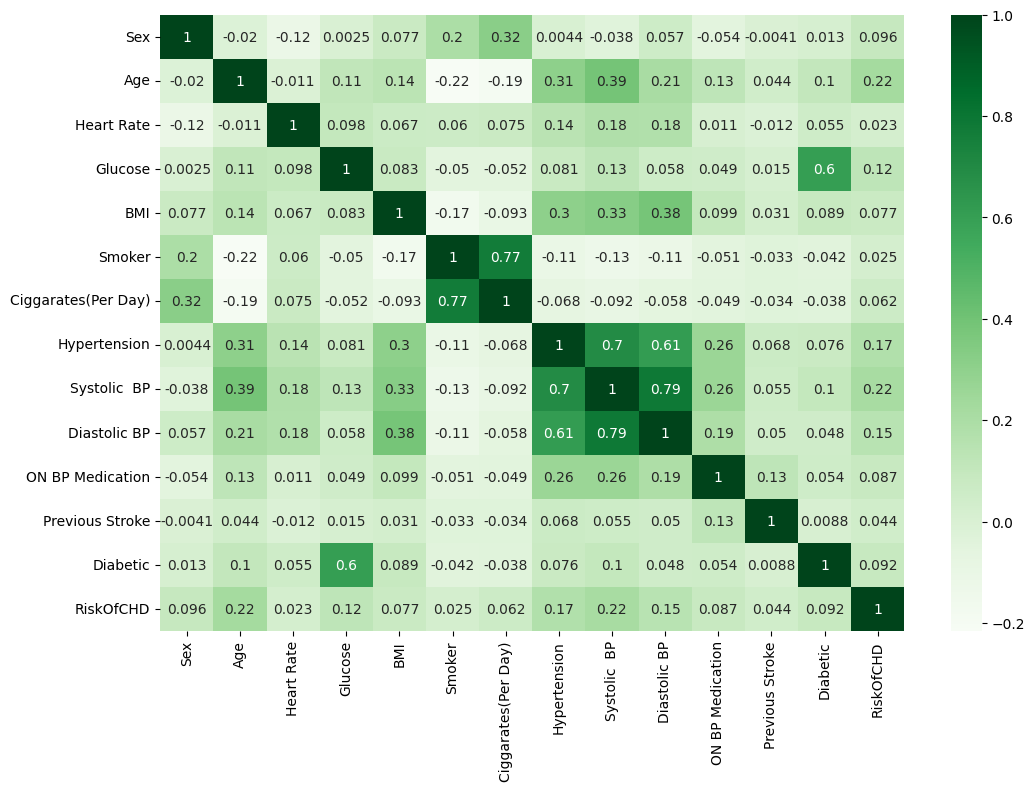

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

**Let's Build The Model**

In [19]:
X= df1.drop('RiskOfCHD', axis=1)
y= df1['RiskOfCHD']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### **SMOTE (Synthetic Minority Over-sampling Technique**)

In [21]:
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=42)
X_train_resampled, y_train_resampled= sm.fit_resample(X_train, y_train)

print("Before: ", y_train.value_counts())
print("After: ", y_train_resampled.value_counts())

Before:  RiskOfCHD
0    2673
1     486
Name: count, dtype: int64
After:  RiskOfCHD
0    2673
1    2673
Name: count, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [28]:
import math

##Calculate Entropy
def entropy(column):
    counts= column.value_counts()
    probabilities= counts/len(column)
    return -sum(probabilities * probabilities.apply(math.log2))
##Caluculate Conditional Entropy
def conditional_entropy(data, feature, target):
    feature_values= data[feature].unique()
    weighted_entropy=0

    for value in feature_values:
        subset= data[data[feature]== value]
        weighted_entropy += (len(subset)/len(data))*entropy(subset[target])
    return weighted_entropy

##Information Gain
def information_gain(data, feature, target):
    total_entropy= entropy(data[target])
    feature_conditional_entropy= conditional_entropy(data, feature, target)
    return total_entropy

for feature in X:
    ig= information_gain(df1, feature, 'RiskOfCHD')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Sex: 0.6140384472794552
Information Gain for Age: 0.6140384472794552


Information Gain for Heart Rate: 0.6140384472794552
Information Gain for Glucose: 0.6140384472794552
Information Gain for BMI: 0.6140384472794552
Information Gain for Smoker: 0.6140384472794552
Information Gain for Ciggarates(Per Day): 0.6140384472794552
Information Gain for Hypertension: 0.6140384472794552
Information Gain for Systolic  BP: 0.6140384472794552
Information Gain for Diastolic BP: 0.6140384472794552
Information Gain for ON BP Medication: 0.6140384472794552
Information Gain for Previous Stroke: 0.6140384472794552
Information Gain for Diabetic: 0.6140384472794552


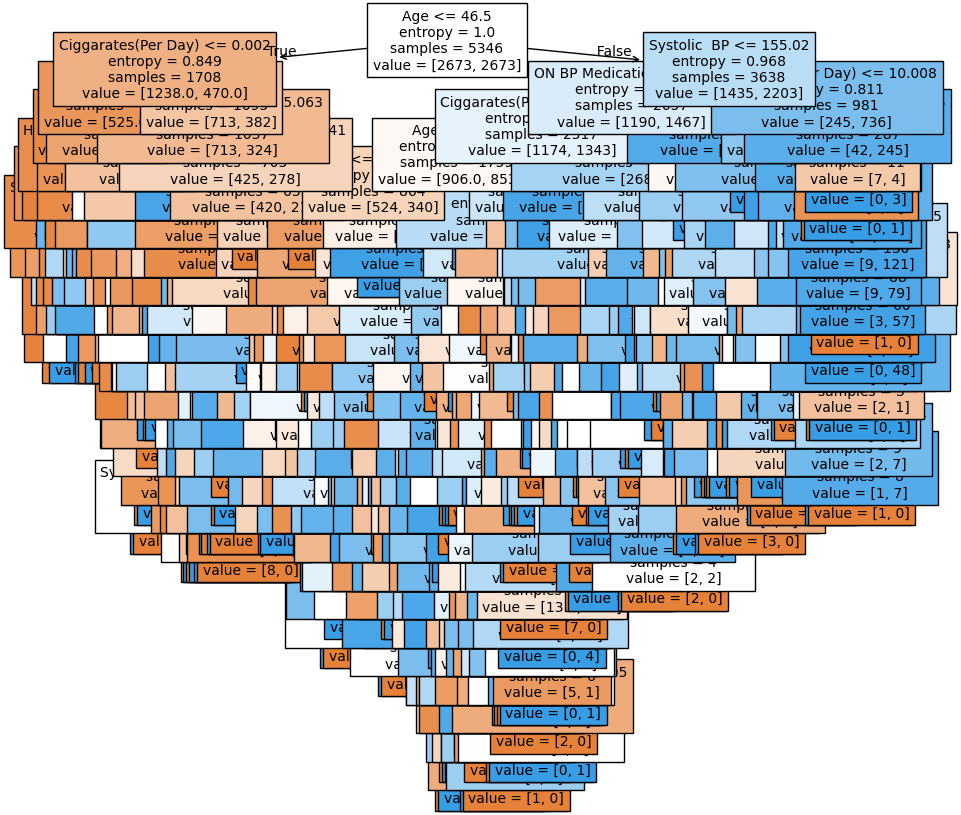

In [31]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

**Model Evaluation**

In [32]:
accuracy= accuracy_score(y_test, y_pred)*100
Classification_Report= classification_report(y_test, y_pred)
Confusion_Matrix= confusion_matrix(y_test, y_pred)

print("Accuracy of the model: ", accuracy)
print("Classification Report: \n", Classification_Report)
print("Confusion Matrix: \n", Confusion_Matrix)

Accuracy of the model:  70.50632911392405
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       677
           1       0.17      0.28      0.22       113

    accuracy                           0.71       790
   macro avg       0.52      0.53      0.52       790
weighted avg       0.77      0.71      0.73       790

Confusion Matrix: 
 [[525 152]
 [ 81  32]]
